<a href="https://colab.research.google.com/github/pramodcgupta/Machine-Learning-Predictions/blob/master/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Diabetes-Prediction/master/data/pima-data.csv")

In [4]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
# check if any null value is present
data.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

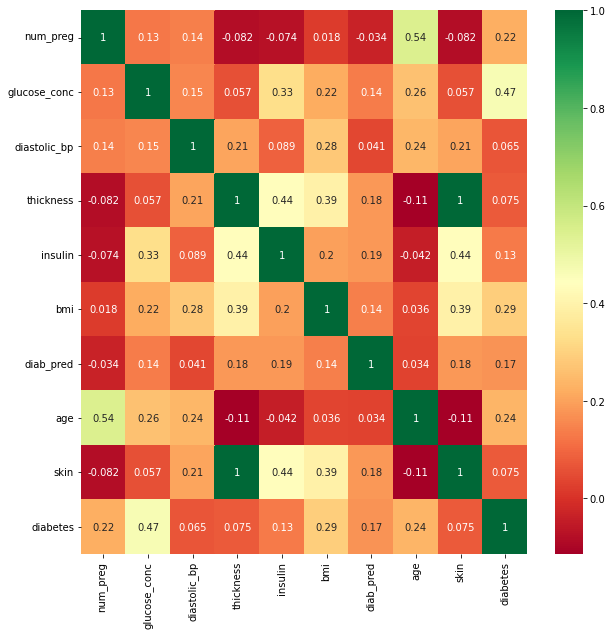

In [8]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
data.corr()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [10]:
diabetes_map = {True: 1, False: 0}

In [11]:
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [12]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [13]:
diabetes_true_count = len(data.loc[data['diabetes'] == True])
diabetes_false_count = len(data.loc[data['diabetes'] == False])

In [14]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [15]:
## Train Test Split

from sklearn.model_selection import train_test_split
feature_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']
predicted_class = ['diabetes']

In [16]:
X = data[feature_columns].values
y = data[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [17]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['skin'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [24]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)

In [30]:
from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy = 0.762


In [31]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X,y.ravel(),cv=10)

In [32]:
score

array([0.68831169, 0.81818182, 0.77922078, 0.7012987 , 0.72727273,
       0.75324675, 0.77922078, 0.81818182, 0.67105263, 0.81578947])

In [33]:
score.mean()

0.7551777170198223

In [46]:
df_x_test = pd.DataFrame(X_test, columns = feature_columns)
df_y_test = pd.DataFrame(y_test, columns = predicted_class)
df_y_pred = pd.DataFrame(y_pred, columns = ['Predicted_Class'])

final_df = pd.concat([df_x_test, df_y_test, df_y_pred], axis = 1)

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)


Accuracy:  0.7619047619047619
precision:  0.7758620689655172
recall:  0.5172413793103449


array([[131,  13],
       [ 42,  45]])

In [47]:
final_df

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes,Predicted_Class
0,4.000000,154.0,72.0,126.000000,31.3,0.338,37.0,1.142600,0,1
1,2.000000,112.0,86.0,160.000000,38.4,0.246,28.0,1.654800,0,0
2,1.000000,135.0,54.0,143.691589,26.7,0.687,62.0,1.174067,0,0
3,3.000000,107.0,62.0,48.000000,22.9,0.678,23.0,0.512200,1,0
4,3.000000,102.0,74.0,143.691589,29.5,0.121,32.0,1.174067,0,0
...,...,...,...,...,...,...,...,...,...,...
226,8.000000,126.0,88.0,108.000000,38.5,0.349,49.0,1.418400,0,0
227,8.000000,197.0,74.0,143.691589,25.9,1.191,39.0,1.174067,1,1
228,3.000000,150.0,76.0,143.691589,21.0,0.207,37.0,1.174067,0,0
229,3.000000,130.0,64.0,143.691589,23.1,0.314,22.0,1.174067,0,0
